**IMPORTING THE NECESSARY LIBRARIES**

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING THE DATASET**

In [85]:
bookings_df = pd.read_csv('/content/Bookings.csv')
sessions_df = pd.read_csv('/content/Sessions.csv')

In [86]:
bookings_df.shape

(339, 13)

In [87]:
sessions_df.shape

(1497, 5)

In [88]:
missing_count = sessions_df['booking_id'].isnull().sum()
print(f"Number of missing booking_id values before imputation: {missing_count}")

sessions_df['booking_id'].fillna(-1, inplace=True)

missing_count_after = sessions_df['booking_id'].isnull().sum()
print(f"Number of missing booking_id values after imputation: {missing_count_after}")

Number of missing booking_id values before imputation: 1131
Number of missing booking_id values after imputation: 0


In [89]:
print(bookings_df.head())
print(sessions_df.head())

    customer_id   booking_id   from_city from_country            to_city  \
0  customer_259   booking_82     Gurgaon        India          Ahmedabad   
1  customer_303  booking_156       Delhi        India           Brussels   
2  customer_203   booking_99  Devanhalli        India  Frankfurt am Main   
3  customer_211  booking_319     Gurgaon        India  Frankfurt am Main   
4  customer_287  booking_222     Gurgaon        India   Roissy-en-France   

  to_country          booking_time device_type_used  INR_Amount service_name  \
0      India  2020-02-05T16:12:08Z          Desktop     2565.28          MMT   
1    Belgium  2018-11-21T08:21:47Z          Android    23120.00        YATRA   
2    Germany  2019-12-16T22:54:58Z          Android    25717.60        YATRA   
3    Germany  2021-10-29T12:25:38Z          Desktop   135969.60      GOIBIBO   
4     France  2020-08-11T16:09:10Z          Android    31791.20      GOIBIBO   

   no_of_passengers  days_to_departure  distance_km  
0       

In [90]:
bookings_df.isnull().sum()

customer_id          0
booking_id           0
from_city            0
from_country         0
to_city              0
to_country           0
booking_time         0
device_type_used     0
INR_Amount           0
service_name         0
no_of_passengers     0
days_to_departure    0
distance_km          0
dtype: int64

In [91]:
sessions_df.isnull().sum()

session_id               0
search_id                0
search_time              0
session_starting_time    0
booking_id               0
dtype: int64

**1. Find the number of distinct bookings, sessions, and searches from the given datasets**

In [92]:
dist_bookings = bookings_df['booking_id'].nunique()
dist_sessions = sessions_df['session_id'].nunique()
dist_searches = sessions_df['search_id'].nunique()

print(f"Number of distinct bookings: {dist_bookings}")
print(f"Number of distinct sessions: {dist_sessions}")
print(f"Number of distinct searches: {dist_searches}")

Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


**2. How many sessions have more than one booking**

In [93]:
bookings_per_session = sessions_df.groupby('session_id')['booking_id'].nunique()
sessions_booking = bookings_per_session[bookings_per_session > 1].count()

print(f"Sessions with more than one booking: {sessions_booking}")

Sessions with more than one booking: 225


**3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week**

Bookings per day of the week:
day_of_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


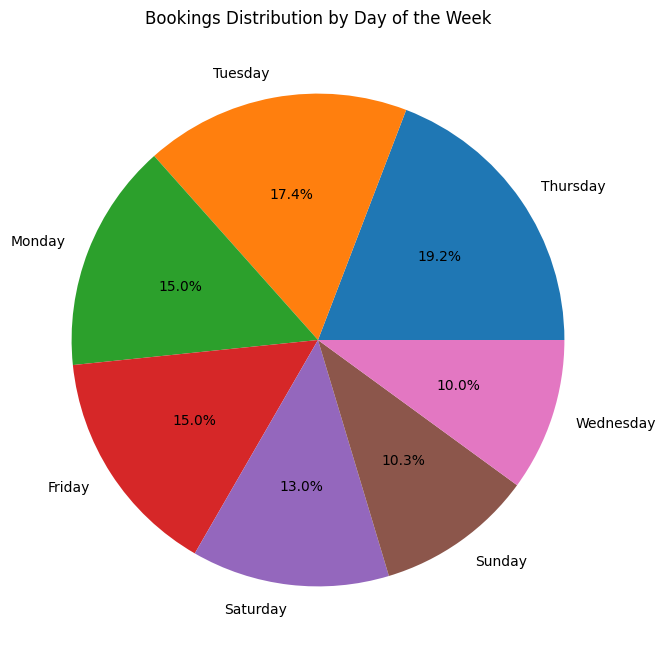

In [94]:
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])
bookings_df['day_of_week'] = bookings_df['booking_time'].dt.day_name()
bookings_per_day = bookings_df['day_of_week'].value_counts()
print(f"Bookings per day of the week:\n{bookings_per_day}")

bookings_per_day.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Bookings Distribution by Day of the Week')
plt.ylabel('')
plt.show()

**4. For each of the service names, display the total number of bookings and the total Gross
Booking Value in INR**

In [95]:
summary = bookings_df.groupby('service_name').agg(
    total_bookings=('booking_id', 'nunique'),
    total_gbv_inr=('INR_Amount', 'sum')
).reset_index()

print(f"Service Summary:\n{summary}")

Service Summary:
  service_name  total_bookings  total_gbv_inr
0      GOIBIBO             186     5897637.97
1          MMT              48      665669.08
2        YATRA             105     3378702.13


**5.For customers who have more than 1 booking, which is the most booked route
(from_city to to_city)?**

In [96]:
more_booking = bookings_df.groupby('customer_id')['booking_id'].nunique()
more_booking = more_booking[more_booking > 1].index

filter = bookings_df[bookings_df['customer_id'].isin(more_booking)]

most_booked = filter.groupby(['from_city', 'to_city']).size().idxmax()

print(f"Most booked route for customers with more than one booking: {most_booked}")

Most booked route for customers with more than one booking: ('Gurgaon', 'Roissy-en-France')


**6. Which are the top 3 departure cities from where customers book mostly in advance,
provided that there have been at least 5 departures from that city?**

In [97]:
bookings_df['days_to_departure'] = pd.to_numeric(bookings_df['days_to_departure'], errors='coerce')
city_departures = bookings_df.groupby('from_city')['days_to_departure'].count()
cities = city_departures[city_departures >= 5].index

filtered = bookings_df[bookings_df['from_city'].isin(cities)]
advance_bookings = filtered.groupby('from_city')['days_to_departure'].mean()

top_3_cities = advance_bookings.nlargest(3)

print(f"Top 3 departure cities with advance bookings:\n{top_3_cities}")


Top 3 departure cities with advance bookings:
from_city
Bālāpur       46.166667
Devanhalli    29.583333
Chennai       26.187500
Name: days_to_departure, dtype: float64


**7.Plot a heatmap displaying correlations of the numerical column and report which pair
of numerical columns in the bookings dataset, have the maximum correlation?**

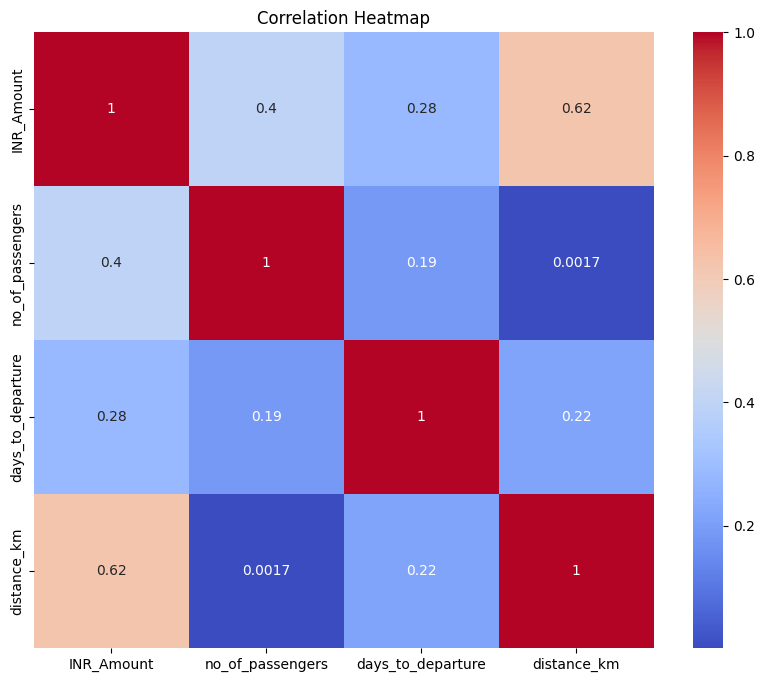

The pair of numerical columns with the maximum correlation: ('INR_Amount', 'INR_Amount')


In [98]:
numerical_data = bookings_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

cor = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().idxmax()

print(f"The pair of numerical columns with the maximum correlation: {cor}")

**8. For each service, which is the most used device type for making bookings on the
platform?**

In [99]:
used_device = bookings_df.groupby('service_name')['device_type_used'].agg(lambda x: x.value_counts().idxmax())

print(f"Most used device type per service:\n{used_device}")

Most used device type per service:
service_name
GOIBIBO        IOS
MMT        Desktop
YATRA      Desktop
Name: device_type_used, dtype: object


**9. Plot the trends at a quarterly frequency for the number of bookings by each of the
device types, that is, plot a time series for each year and quarter showing the number
of bookings performed by each device type**

<ipython-input-100-f7f35a326f21>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings_df['quarter'] = bookings_df['booking_time'].dt.to_period('Q')


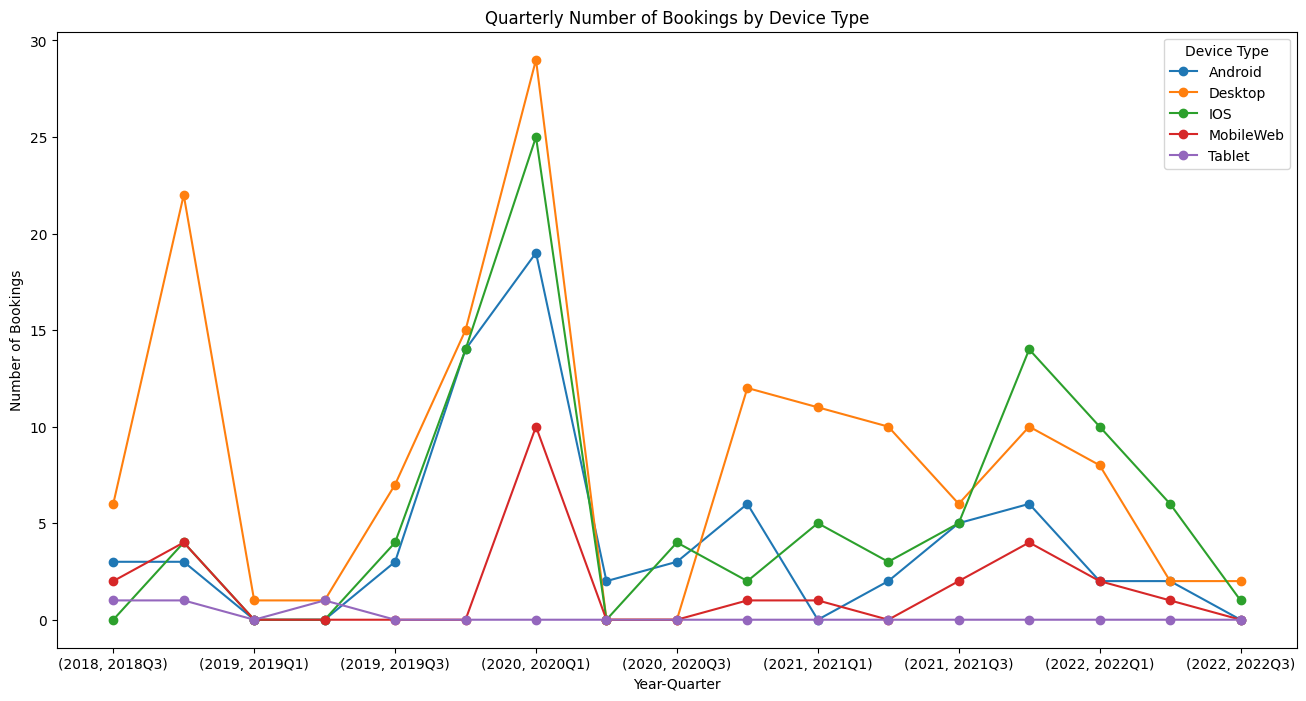

In [100]:
bookings_df['year'] = bookings_df['booking_time'].dt.year
bookings_df['quarter'] = bookings_df['booking_time'].dt.to_period('Q')
quarterly = bookings_df.groupby(['year', 'quarter', 'device_type_used']).size().unstack(fill_value=0)

quarterly.plot(kind='line', marker='o', figsize=(16, 8))
plt.title('Quarterly Number of Bookings by Device Type')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.show()

**10. Consider the following example:12 customers performed a total of 100 searches but
 only a few of them performed 10 bookings in total.
searches=100 bookings=10 customers=12
The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following:**

• What is the average oBSR for each month of the year?

• What is the average oBSR for each day of the week?

• Plot a time series of oBSR on all the given dates

Average oBSR per month:
month
1     0.036029
2     0.036765
3     0.017647
4     0.008088
5     0.004412
6     0.009559
7     0.008824
8     0.005882
9     0.025000
10    0.035294
11    0.028676
12    0.032353
dtype: float64
Average oBSR per day of the week:
day_of_week
Friday       0.037500
Monday       0.037500
Saturday     0.032353
Sunday       0.025735
Thursday     0.047794
Tuesday      0.042647
Wednesday    0.025000
dtype: float64


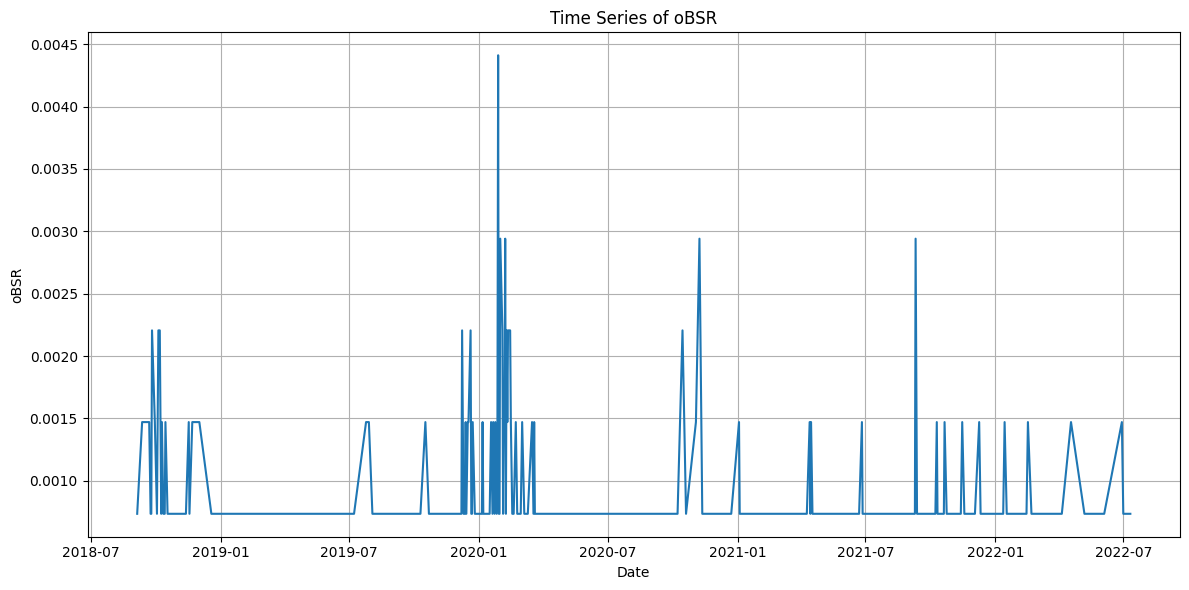

In [101]:
bookings_df['booking_time'] = pd.to_datetime(bookings_df['booking_time'])
sessions_df['search_time'] = pd.to_datetime(sessions_df['search_time'], format='ISO8601')

sessions_df = sessions_df.dropna(subset=['booking_id'])


total_searches = sessions_df['search_id'].nunique()
total_bookings = bookings_df['booking_id'].nunique()

merged_df = pd.merge(bookings_df, sessions_df, on='booking_id', how='inner')

merged_df['month'] = merged_df['booking_time'].dt.month
merged_df['day_of_week'] = merged_df['booking_time'].dt.day_name()

monthly_obsr = merged_df.groupby('month').apply(lambda x: x['booking_id'].nunique() / total_searches)
print("Average oBSR per month:")
print(monthly_obsr)

weekly_obsr = merged_df.groupby('day_of_week').apply(lambda x: x['booking_id'].nunique() / total_searches)
print("Average oBSR per day of the week:")
print(weekly_obsr)

merged_df['date'] = merged_df['booking_time'].dt.date
daily_obsr = merged_df.groupby('date').apply(lambda x: x['booking_id'].nunique() / total_searches)

plt.figure(figsize=(12, 6))
daily_obsr.plot()
plt.title('Time Series of oBSR')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.grid(True)
plt.tight_layout()
plt.show()
